<a href="https://colab.research.google.com/github/siupong114/Bitcoin/blob/main/Master_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [1]:
!pip install pandas_ta
!pip install numpy==1.23.5
!pip install pandas
!pip install seaborn

In [2]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for building linear regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import summary_table, OLSInfluence
from statsmodels.regression.linear_model import OLSResults
from statsmodels.stats.stattools import durbin_watson as dwtest
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

from scipy import stats
from scipy.stats import zscore

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score

import pylab as py

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)


#Load dataset

In [3]:
!git clone https://github.com/ArthurChan-1111/Bitcoin_prediction.git

%cd Bitcoin_prediction

%pip install pandas_ta

import pandas as pd
import pandas_ta as ta
import csv
import numpy as np

btc_data = pd.read_csv('Bitcoin Historical Data.csv', on_bad_lines='skip', lineterminator='\n')
btc_data.tail(5)

Cloning into 'Bitcoin_prediction'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 185 (delta 36), reused 8 (delta 2), pack-reused 119 (from 1)
Receiving objects: 100% (185/185), 11.82 MiB | 14.25 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/Bitcoin_prediction


,Date,Price,Open,High,Low,Vol. ('000),Change %\r
4107,1/5/2014,1014.7000,924.7000,1029.9000,911.4000,21.37,9.74%\r
4108,1/4/2014,924.7000,884.3000,932.2000,848.3000,14.24,4.57%\r
4109,1/3/2014,884.3000,856.9000,888.2000,839.4000,9.71,3.19%\r
4110,1/2/2014,856.9000,815.9000,886.2000,810.5000,12.81,5.02%\r
4111,1/1/2014,815.9000,805.9000,829.9000,771.0000,10.76,1.24%


In [4]:
# Convert the dictionary to a DataFrame
btc_data = pd.DataFrame(btc_data)

# Parse the "Date" column into datetime format
btc_data["Date"] = pd.to_datetime(btc_data["Date"], format="%m/%d/%Y")

# Sort the data by date in ascending order
btc_data.sort_values(by="Date", ascending=True, inplace=True)


In [6]:
!git clone https://github.com/ArthurChan-1111/Bitcoin_prediction.git

%cd Bitcoin_prediction

gold_price_data = pd.read_csv('gold_price_data.csv', on_bad_lines='skip', lineterminator='\n', sep=';')
gold_price_data.tail(5)

Cloning into 'Bitcoin_prediction'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 185 (delta 36), reused 8 (delta 2), pack-reused 119 (from 1)
Receiving objects: 100% (185/185), 11.82 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction


,Date,Gold_Price,Gold_Volume
4047,2025-01-30,2794.0600,83835.0000
4048,2025-01-31,2799.2300,91164.0000
4049,2025-02-01,2799.2300,91164.0000
4050,2025-02-02,2799.2300,91164.0000
4051,2025-02-03,2794.4100,1631.0000


#Data Preprocessing

In [ ]:
#Function to clean and convert volume data
def clean_volume(volume):
    if isinstance(volume, str):  # Check if the value is a string
        volume = volume.replace(',', '')  # Remove commas
        if 'B' in volume:  # If the value contains 'B' (billions)
            return float(volume.replace('B', '')) * 1_000_000_000
        elif 'M' in volume:  # If the value contains 'M' (millions)
            return float(volume.replace('M', '')) * 1_000_000
        elif 'K' in volume:  # If the value contains 'K' (thousands)
            return float(volume.replace('K', '')) * 1_000
        else:  # If no suffix is present, convert to float directly
            return float(volume)
    return np.nan  # Handle unexpected cases

# Apply the cleaning function to the volume column
btc_data["Volume"] = btc_data["Vol. ('000)"].apply(clean_volume)
btc_data = btc_data.drop("Vol. ('000)", axis=1)

# 4. Remove '%' from "Change %" and convert to numeric
btc_data.rename(columns={"Change %\r": "Change"}, inplace=True)
btc_data["Change"] = btc_data["Change"].str.replace("%", "").str.strip().astype(float)

In [ ]:
# Day of the week (0=Monday, 6=Sunday)
btc_data["Day_of_Week"] = btc_data["Date"].dt.dayofweek

# Week of the year
btc_data["Week_of_Year"] = btc_data["Date"].dt.isocalendar().week

# Month of the year
btc_data["Month"] = btc_data["Date"].dt.month

# Quarter of the year
btc_data["Quarter"] = btc_data["Date"].dt.quarter

# Year
btc_data["Year"] = btc_data["Date"].dt.year

In [ ]:
# Calculate RSI, EMA, SMA, and MACD
btc_data["RSI_6"] = ta.rsi(btc_data["Price"], length=6)  # Relative Strength Index
btc_data["RSI_12"] = ta.rsi(btc_data["Price"], length=12)  # Relative Strength Index
btc_data["EMA_14"] = ta.ema(btc_data["Price"], length=14)  # Exponential Moving Average
btc_data["SMA_14"] = ta.sma(btc_data["Price"], length=14)  # Simple Moving Average

# Add On-Balance Volume (OBV)
btc_data["OBV"] = ta.obv(btc_data["Price"], btc_data["Volume"])

# Calculate MACD --------------------------------------------------------------------------------------
macd = ta.macd(btc_data["Price"], fast=12, slow=26, signal=9)
btc_data["MACD"] = macd["MACD_12_26_9"]
btc_data["MACD_Signal"] = macd["MACDs_12_26_9"]
btc_data["MACD_Hist"] = macd["MACDh_12_26_9"]

# Create MACD_buy: 1 if MACD crosses above MACD_Signal, otherwise 0
btc_data["MACD_buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["MACD"] > btc_data["MACD_Signal"]) &  # MACD is above Signal
    (btc_data["MACD"].shift(1) <= btc_data["MACD_Signal"].shift(1)),  # Previous MACD was below or equal to Signal
    "MACD_buy"] = 1  # Buy signal

# Create MACD_sell: 1 if MACD crosses below MACD_Signal, otherwise 0
btc_data["MACD_sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["MACD"] <= btc_data["MACD_Signal"]) &  # MACD is below or equal to Signal
    (btc_data["MACD"].shift(1) > btc_data["MACD_Signal"].shift(1)),  # Previous MACD was above Signal
    "MACD_sell"] = 1  # Sell signal

# Calculate Bollinger Bands --------------------------------------------------------------------------------------
bbands = ta.bbands(btc_data["Price"], length=20, std=2)
btc_data["BB_Lower"] = bbands["BBL_20_2.0"]  # Lower Band
btc_data["BB_Middle"] = bbands["BBM_20_2.0"]  # Middle Band
btc_data["BB_Upper"] = bbands["BBU_20_2.0"]  # Upper Band

# Create BB_Buy: 1 if Price crosses below the Lower Band, otherwise 0
btc_data["BB_Buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["Price"] < btc_data["BB_Lower"]) &  # Price is below the Lower Band
    (btc_data["Price"].shift(1) >= btc_data["BB_Lower"].shift(1)),  # Previous Price was above or equal to Lower Band
    "BB_Buy"] = 1  # Buy signal

# Create BB_Sell: 1 if Price crosses above the Upper Band, otherwise 0
btc_data["BB_Sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["Price"] > btc_data["BB_Upper"]) &  # Price is above the Upper Band
    (btc_data["Price"].shift(1) <= btc_data["BB_Upper"].shift(1)),  # Previous Price was below or equal to Upper Band
    "BB_Sell"] = 1  # Sell signal

# Calculate ATR --------------------------------------------------------------------------------------
btc_data["ATR"] = ta.atr(btc_data["High"], btc_data["Low"], btc_data["Price"], length=14)

# Set Stop-Loss Levels (Example with Long Trade)
atr_multiplier = 2
btc_data["Stop_Loss_Long"] = btc_data["Price"] - (btc_data["ATR"] * atr_multiplier) #Stop-Loss for Buy (Long) Trade
btc_data["Stop_Loss_Short"] = btc_data["Price"] + (btc_data["ATR"] * atr_multiplier) #Stop-Loss for Sell (Short) Trade

# Calculate VWAP --------------------------------------------------------------------------------------
btc_data.set_index("Date", inplace=True) # Set the "Date" column as the index
btc_data["VWAP"] = ta.vwap(btc_data["High"], btc_data["Low"], btc_data["Price"], btc_data["Volume"])

# Create VWAP_Buy: 1 if Price crosses above VWAP, otherwise 0
btc_data["VWAP_Buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["Price"] > btc_data["VWAP"]) &  # Price is above VWAP
    (btc_data["Price"].shift(1) <= btc_data["VWAP"].shift(1)),  # Previous Price was below or equal to VWAP
    "VWAP_Buy"] = 1  # Buy signal

# Create VWAP_Sell: 1 if Price crosses below VWAP, otherwise 0
btc_data["VWAP_Sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["Price"] < btc_data["VWAP"]) &  # Price is below VWAP
    (btc_data["Price"].shift(1) >= btc_data["VWAP"].shift(1)),  # Previous Price was above or equal to VWAP
    "VWAP_Sell"] = 1  # Sell signal

# Fear and greed index
fear_and_greed_index = pd.read_csv('fear_and_greed_index.csv')
# rename the date column in fear_and_greed_index to Date
fear_and_greed_index.rename(columns={"date": "Date", "value": "Fear_and_Greed_Index"}, inplace=True)
# convert the date column to datetime
fear_and_greed_index["Date"] = pd.to_datetime(fear_and_greed_index["Date"], format="%Y-%m-%d")
# dropping the timestamp, value_classification, time_until_update columns
fear_and_greed_index.drop(columns=["timestamp", "value_classification", "time_until_update"], inplace=True)
fear_and_greed_index.head()

# Join the two dataframes on the "Date" column, dropping
btc_data = btc_data.merge(fear_and_greed_index, on="Date", how="left")
btc_data.head(20)

# Support and Resistance Levels
btc_data["Support"] = btc_data["Low"].rolling(window=20).min()  # Lowest low in the past 20 days
btc_data["Resistance"] = btc_data["High"].rolling(window=20).max()  # Highest high in the past 20 days

# normalize the Fear_and_Greed_Index column
btc_data["Fear_and_Greed_Index"] = (btc_data["Fear_and_Greed_Index"] - btc_data["Fear_and_Greed_Index"].min()) / (btc_data["Fear_and_Greed_Index"].max() - btc_data["Fear_and_Greed_Index"].min())
btc_data.describe().T

# Add two columns for extreme fear and extreme greed
btc_data["Extreme_Fear"] = np.where(btc_data["Fear_and_Greed_Index"] < 0.2, 1, 0)
btc_data["Extreme_Greed"] = np.where(btc_data["Fear_and_Greed_Index"] > 0.8, 1, 0)
btc_data.describe().T

# Use 70 in RSI to classify overbought and 30 to classify oversold
btc_data["RSI_12_Overbought"] = np.where(btc_data["RSI_12"] > 70, 1, 0)
btc_data["RSI_12_Oversold"] = np.where(btc_data["RSI_12"] < 30, 1, 0)
btc_data.describe().T

# Adding RSI_6 greater than RSI_12 to show bullish divergence and conversely
btc_data["RSI_Bullish_Divergence"] = np.where(btc_data["RSI_6"] > btc_data["RSI_12"], 1, 0)
btc_data["RSI_Bearish_Divergence"] = np.where(btc_data["RSI_6"] < btc_data["RSI_12"], 1, 0)
btc_data.describe().T

# Display the first few rows of the data with calculated indicators
btc_data.tail(20)

,Date,Price,Open,High,Low,Change,Volume,Day_of_Week,Week_of_Year,Month,Quarter,Year,RSI_6,RSI_12,EMA_14,SMA_14,OBV,MACD,MACD_Signal,MACD_Hist,MACD_buy,MACD_sell,BB_Lower,BB_Middle,BB_Upper,BB_Buy,BB_Sell,ATR,Stop_Loss_Long,Stop_Loss_Short,VWAP,VWAP_Buy,VWAP_Sell,Fear_and_Greed_Index,Support,Resistance,Extreme_Fear,Extreme_Greed,RSI_12_Overbought,RSI_12_Oversold,RSI_Bullish_Divergence,RSI_Bearish_Divergence
4092,2025-03-17,84019.1000,82580.3000,84729.2000,82525.0000,1.7400,58.0400,0,12,3,1,2025,49.9026,45.0986,84597.3187,84459.3571,-2066535640.0700,-2811.5108,-3072.1414,260.6306,0,0,78135.6468,85114.2950,92092.9432,0,0,4302.4238,75414.2524,92623.9476,83757.7667,1,0,0.3000,76677.1000,94986.5000,0,0,0,0,1,0
4093,2025-03-18,82719.1000,84019.1000,84019.1000,81171.3000,-1.5500,58.1700,1,12,3,1,2025,44.3941,42.8459,84346.8895,84134.5571,-2066535698.2400,-2722.6466,-3002.2424,279.5958,0,0,77992.3432,85039.6150,92086.8868,0,0,4198.5221,74322.0558,91116.1442,82636.5000,0,0,0.3222,76677.1000,94986.5000,0,0,0,0,1,0
4094,2025-03-19,86841.0000,82719.1000,86990.6000,82557.5000,4.9800,84.6100,2,12,3,1,2025,60.8409,51.2659,84679.4376,83865.2214,-2066535613.6300,-2293.1838,-2860.4307,567.2469,0,0,78057.4447,85145.9350,92234.4253,0,0,4215.2776,78410.4447,95271.5553,85463.0333,0,0,0.3000,76677.1000,94986.5000,0,0,0,0,1,0
4095,2025-03-20,84208.1000,86841.3000,87419.0000,83656.1000,-3.0300,69.8600,3,12,3,1,2025,49.5966,46.4930,84616.5926,83456.4500,-2066535683.4900,-2140.6088,-2716.4663,575.8575,0,0,78044.6544,85137.2800,92229.9056,0,0,4182.9650,75842.1701,92574.0299,85094.4000,0,1,0.4889,76677.1000,94986.5000,0,0,0,0,1,0
4096,2025-03-21,84073.3000,84208.7000,84831.0000,83215.9000,-0.1600,42.8000,4,12,3,1,2025,49.0398,46.2525,84544.1536,83280.8857,-2066535726.2900,-2007.4289,-2574.6589,567.2299,0,0,77943.9014,85037.3650,92130.8286,0,0,3999.5460,76074.2079,92072.3921,84040.0667,1,0,0.2889,76677.1000,94986.5000,0,0,0,0,1,0
4097,2025-03-22,83840.5000,84076.6000,84526.3000,83688.2000,-0.2800,20.8400,5,12,3,1,2025,47.9247,45.8061,84450.3331,83110.7857,-2066535747.1300,-1898.7800,-2439.4831,540.7031,0,0,78816.4174,84516.1350,90215.8526,0,0,3773.7285,76293.0431,91387.9569,84018.3333,0,1,0.3000,76677.1000,94266.1000,0,0,0,0,1,0
4098,2025-03-23,86077.4000,83840.2000,86082.0000,83812.7000,2.6700,31.1300,6,12,3,1,2025,58.7418,50.7853,84667.2753,83495.4857,-2066535716.0000,-1613.5754,-2274.3015,660.7261,0,0,78817.3778,84509.5200,90201.6622,0,0,3666.2693,78744.8614,93409.9386,85324.0333,1,0,0.2778,76677.1000,92802.0000,0,0,0,0,1,0
4099,2025-03-24,87490.0000,86076.1000,88740.2000,85541.6000,1.6400,95.7100,0,13,3,1,2025,64.3530,53.7149,85043.6386,84132.2071,-2066535620.2900,-1259.0502,-2071.2513,812.2011,0,0,78806.1037,84520.7050,90235.3063,0,0,3632.8643,80224.2713,94755.7287,87257.2667,0,0,0.4444,76677.1000,92802.0000,0,0,0,0,1,0
4100,2025-03-25,87404.0000,87495.3000,88523.3000,86328.5000,-0.1000,75.2400,1,13,3,1,2025,63.7199,53.5034,85358.3535,84452.4143,-2066535695.5300,-973.8006,-1851.7611,877.9606,0,0,79183.7953,84360.3200,89536.8447,0,0,3530.1455,80343.7091,94464.2909,87418.6000,0,1,0.4556,76677.1000,92802.0000,0,0,0,0,1,0
4101,2025-03-26,86912.0000,87349.8000,88276.7000,85866.4000,-0.5600,62.0400,2,13,3,1,2025,59.6885,52.2200,85565.5063,84684.3929,-2066535757.5700,-778.4648,-1637.1019,858.6371,0,0,79540.1981,84209.3750,88878.5519,0,0,3450.1565,80011.6870,93812.3130,87018.3667,0,0,0.4667,76677.1000,91059.8000,0,0,0,0,1,0


In [ ]:
# Calculate the percentage price change over the next 7 days (Target Variable for Regression)
btc_data["Pct_Change"] = ((btc_data["Price"].shift(-7) - btc_data["Price"]) / btc_data["Price"]) * 100

In [ ]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    4112 non-null   datetime64[ns]
 1   Price                   4112 non-null   float64       
 2   Open                    4112 non-null   float64       
 3   High                    4112 non-null   float64       
 4   Low                     4112 non-null   float64       
 5   Change                  4112 non-null   float64       
 6   Volume                  4112 non-null   float64       
 7   Day_of_Week             4112 non-null   int32         
 8   Week_of_Year            4112 non-null   UInt32        
 9   Month                   4112 non-null   int32         
 10  Quarter                 4112 non-null   int32         
 11  Year                    4112 non-null   int32         
 12  RSI_6                   4106 non-null   float64 

## **Re-scale and Transformation**

**Yeo-Johnson Transformation** for Price, Change, Pct_Change

In [ ]:
# For Price, Change, Pct_Change (use yeo-johnson)
from sklearn.preprocessing import PowerTransformer
import pandas as pd
# Initialize PowerTransformer for each column
power_transformer_price = PowerTransformer(method='yeo-johnson', standardize=False)  # Disable standardization here
power_transformer_change = PowerTransformer(method='yeo-johnson', standardize=False)
power_transformer_pct_change = PowerTransformer(method='yeo-johnson', standardize=False)

# Apply the Yeo-Johnson transformation to "Price"
btc_data['YeoJohnson_Price'] = power_transformer_price.fit_transform(btc_data[['Price']])
btc_data['YeoJohnson_Change'] = power_transformer_change.fit_transform(btc_data[['Change']])
btc_data['YeoJohnson_Pct_Change'] = power_transformer_pct_change.fit_transform(btc_data[['Pct_Change']])

# Store lambda values for each column
lambdas = {
    'Price_lambda': power_transformer_price.lambdas_[0],
    'Change_lambda': power_transformer_change.lambdas_[0],
    'Pct_Change_lambda': power_transformer_pct_change.lambdas_[0]}

# Calculate mean and standard deviation for each transformed column
transformed_means = {
    'Price_mean': btc_data['YeoJohnson_Price'].mean(),
    'Change_mean': btc_data['YeoJohnson_Change'].mean(),
    'Pct_Change_mean': btc_data['YeoJohnson_Pct_Change'].mean()}

transformed_stds = {
    'Price_std': btc_data['YeoJohnson_Price'].std(),
    'Change_std': btc_data['YeoJohnson_Change'].std(),
    'Pct_Change_std': btc_data['YeoJohnson_Pct_Change'].std()}

# Print the collected lambdas, means, and standard deviations
print(f"Lambdas: {lambdas}")
print(f"Means: {transformed_means}")
print(f"Standard Deviations: {transformed_stds}")

### Step 2: Back-Transformation ###
# Recreate PowerTransformers with stored lambdas for back-transformation
power_transformer_price.lambdas_ = [lambdas['Price_lambda']]
power_transformer_change.lambdas_ = [lambdas['Change_lambda']]
power_transformer_pct_change.lambdas_ = [lambdas['Pct_Change_lambda']]

Lambdas: {'Price_lambda': 0.14010275610694164, 'Change_lambda': 0.8205229400088366, 'Pct_Change_lambda': 0.8509874190934532}
Means: {'Price_mean': 17.919095292940135, 'Change_mean': -0.3119563265517425, 'Pct_Change_mean': -0.5122816173629563}
Standard Deviations: {'Price_std': 6.273488664045828, 'Change_std': 5.106427645661079, 'Pct_Change_std': 12.487698933474627}


In [ ]:
numerical_variable = btc_data.select_dtypes(include=['number'])
btc_data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change', 'Volume',
       'Day_of_Week', 'Week_of_Year', 'Month', 'Quarter', 'Year', 'RSI_6',
       'RSI_12', 'EMA_14', 'SMA_14', 'OBV', 'MACD', 'MACD_Signal', 'MACD_Hist',
       'MACD_buy', 'MACD_sell', 'BB_Lower', 'BB_Middle', 'BB_Upper', 'BB_Buy',
       'BB_Sell', 'ATR', 'Stop_Loss_Long', 'Stop_Loss_Short', 'VWAP',
       'VWAP_Buy', 'VWAP_Sell', 'Fear_and_Greed_Index', 'Support',
       'Resistance', 'Extreme_Fear', 'Extreme_Greed', 'RSI_12_Overbought',
       'RSI_12_Oversold', 'RSI_Bullish_Divergence', 'RSI_Bearish_Divergence',
       'Pct_Change', 'YeoJohnson_Price', 'YeoJohnson_Change',
       'YeoJohnson_Pct_Change'],
      dtype='object')

**Standardize all numeric variable**

store to scaled_btc_data

In [ ]:
#Standardize all numeric variable
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# List of features for scaling
numeric_features = ['Price', 'Open', 'High', 'Low', 'Change', 'Volume', 'RSI_6', 'RSI_12', 'EMA_14',
       'SMA_14', 'OBV', 'MACD', 'MACD_Signal', 'MACD_Hist',
       'BB_Lower', 'BB_Middle', 'BB_Upper',
       'ATR', 'Stop_Loss_Long', 'Stop_Loss_Short', 'VWAP', 'Support', 'Resistance', 'Pct_Change', 'Fear_and_Greed_Index',
                    'YeoJohnson_Price', 'YeoJohnson_Change', 'YeoJohnson_Pct_Change']

# Fit and transform only the numeric features
scaled_features = standard_scaler.fit_transform(btc_data[numeric_features])

# Create a new DataFrame for scaled data
scaled_btc_data = btc_data.copy()  # Copy original DataFrame

# Replace numeric columns in the new DataFrame with scaled values
scaled_btc_data[numeric_features] = scaled_features

scaled_btc_data.tail()

,Date,Price,Open,High,Low,Change,Volume,Day_of_Week,Week_of_Year,Month,Quarter,Year,RSI_6,RSI_12,EMA_14,SMA_14,OBV,MACD,MACD_Signal,MACD_Hist,MACD_buy,MACD_sell,BB_Lower,BB_Middle,BB_Upper,BB_Buy,BB_Sell,ATR,Stop_Loss_Long,Stop_Loss_Short,VWAP,VWAP_Buy,VWAP_Sell,Fear_and_Greed_Index,Support,Resistance,Extreme_Fear,Extreme_Greed,RSI_12_Overbought,RSI_12_Oversold,RSI_Bullish_Divergence,RSI_Bearish_Divergence,Pct_Change,YeoJohnson_Price,YeoJohnson_Change,YeoJohnson_Pct_Change
4107,2025-04-01,2.6715,2.5670,2.6141,2.6417,0.4266,-0.0871,1,14,4,2,2025,0.1076,-0.2047,2.6707,2.6876,-1.6044,-0.9832,-1.1642,0.4610,0,0,2.8520,2.6726,2.5104,0,0,1.9599,2.7141,2.6240,2.6427,1,0,-0.5946,2.8802,2.5117,0,0,0,0,1,0,NaN,1.5881,0.5927,NaN
4108,2025-04-02,2.5632,2.6744,2.7295,2.6385,-0.4897,-0.0871,2,14,4,2,2025,-0.6897,-0.6506,2.6592,2.6749,-1.6044,-1.0604,-1.1542,0.1432,0,0,2.8648,2.6755,2.5050,0,0,2.1356,2.5777,2.5396,2.6448,0,1,-0.1376,2.9207,2.5117,0,0,0,0,0,1,NaN,1.5635,-0.6499,NaN
4109,2025-04-03,2.5893,2.5659,2.5498,2.5946,0.0759,-0.0871,3,14,4,2,2025,-0.4565,-0.5219,2.6527,2.6718,-1.6044,-1.0655,-1.1472,0.1001,0,0,2.8609,2.6738,2.5052,0,0,2.0859,2.6112,2.5593,2.5780,1,0,-1.0059,2.9363,2.5117,0,0,0,0,0,1,NaN,1.5695,0.2037,NaN
4110,2025-04-04,2.6183,2.5921,2.5818,2.6104,0.0876,-0.0871,4,14,4,2,2025,-0.1944,-0.3766,2.6510,2.6712,-1.6044,-1.0091,-1.1299,0.2461,0,0,2.8594,2.6728,2.5047,0,0,2.0658,2.6450,2.5842,2.6037,0,0,-0.8688,2.9363,2.5117,0,0,0,0,1,0,NaN,1.5761,0.2178,NaN
4111,2025-04-05,2.6054,2.6215,2.5635,2.6396,-0.0922,-0.0871,5,14,4,2,2025,-0.3119,-0.4362,2.6478,2.6704,-1.6044,-0.9771,-1.1092,0.2916,0,0,2.8652,2.6748,2.5035,0,0,1.9757,2.6402,2.5645,2.6027,0,0,-0.7774,2.9363,2.5117,0,0,0,0,1,0,NaN,1.5732,-0.0156,NaN


# **Please use scaled_btc_data for analysis**

## Back Transformation After prediction (for interpretation)

In [ ]:
# Recreate PowerTransformers with stored lambdas for back-transformation
power_transformer_price.lambdas_ = [lambdas['Price_lambda']]
power_transformer_change.lambdas_ = [lambdas['Change_lambda']]
power_transformer_pct_change.lambdas_ = [lambdas['Pct_Change_lambda']]

# Step 1: De-standardize the standardized values to get Yeo-Johnson transformed values
scaled_btc_data['YeoJohnson_Price_Back'] = (
    scaled_btc_data['YeoJohnson_Price'] * transformed_stds['Price_std']
) + transformed_means['Price_mean']

scaled_btc_data['YeoJohnson_Change_Back'] = (
    scaled_btc_data['YeoJohnson_Change'] * transformed_stds['Change_std']
) + transformed_means['Change_mean']

scaled_btc_data['YeoJohnson_Pct_Change_Back'] = (
    scaled_btc_data['YeoJohnson_Pct_Change'] * transformed_stds['Pct_Change_std']
) + transformed_means['Pct_Change_mean']

# Step 2: Create temporary DataFrames with the exact column names used during fit
price_back_df = scaled_btc_data[['YeoJohnson_Price_Back']].rename(columns={'YeoJohnson_Price_Back': 'Price'})
change_back_df = scaled_btc_data[['YeoJohnson_Change_Back']].rename(columns={'YeoJohnson_Change_Back': 'Change'})
pct_change_back_df = scaled_btc_data[['YeoJohnson_Pct_Change_Back']].rename(columns={'YeoJohnson_Pct_Change_Back': 'Pct_Change'})

# Step 3: Apply the inverse transformation to recover the original values
scaled_btc_data['Original_Price'] = power_transformer_price.inverse_transform(price_back_df)
scaled_btc_data['Original_Change'] = power_transformer_change.inverse_transform(change_back_df)
scaled_btc_data['Original_Pct_Change'] = power_transformer_pct_change.inverse_transform(pct_change_back_df)

# Step 4: Display the back-transformed data
print("\nBack-Transformed Data:")
print(scaled_btc_data[['Original_Price', 'Original_Change', 'Original_Pct_Change']].head())


Back-Transformed Data:
   Original_Price  Original_Change  Original_Pct_Change
0        815.6362           1.2402              15.0653
1        856.6300           5.0207               9.3490
2        884.0259           3.1905               8.3129
3        924.4202           4.5707               8.7176
4       1014.4084           9.7414              -7.3823


In [ ]:
scaled_btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        4112 non-null   datetime64[ns]
 1   Price                       4112 non-null   float64       
 2   Open                        4112 non-null   float64       
 3   High                        4112 non-null   float64       
 4   Low                         4112 non-null   float64       
 5   Change                      4112 non-null   float64       
 6   Volume                      4112 non-null   float64       
 7   Day_of_Week                 4112 non-null   int32         
 8   Week_of_Year                4112 non-null   UInt32        
 9   Month                       4112 non-null   int32         
 10  Quarter                     4112 non-null   int32         
 11  Year                        4112 non-null   int32       

In [ ]:
scaled_btc_data.tail()

,Date,Price,Open,High,Low,Change,Volume,Day_of_Week,Week_of_Year,Month,Quarter,Year,RSI_6,RSI_12,EMA_14,SMA_14,OBV,MACD,MACD_Signal,MACD_Hist,MACD_buy,MACD_sell,BB_Lower,BB_Middle,BB_Upper,BB_Buy,BB_Sell,ATR,Stop_Loss_Long,Stop_Loss_Short,VWAP,VWAP_Buy,VWAP_Sell,Fear_and_Greed_Index,Support,Resistance,Extreme_Fear,Extreme_Greed,RSI_12_Overbought,RSI_12_Oversold,RSI_Bullish_Divergence,RSI_Bearish_Divergence,Pct_Change,YeoJohnson_Price,YeoJohnson_Change,YeoJohnson_Pct_Change,YeoJohnson_Price_Back,YeoJohnson_Change_Back,YeoJohnson_Pct_Change_Back,Original_Price,Original_Change,Original_Pct_Change
4107,2025-04-01,2.6715,2.5670,2.6141,2.6417,0.4266,-0.0871,1,14,4,2,2025,0.1076,-0.2047,2.6707,2.6876,-1.6044,-0.9832,-1.1642,0.4610,0,0,2.8520,2.6726,2.5104,0,0,1.9599,2.7141,2.6240,2.6427,1,0,-0.5946,2.8802,2.5117,0,0,0,0,1,0,NaN,1.5881,0.5927,NaN,27.8820,2.7148,NaN,85185.2327,3.1705,NaN
4108,2025-04-02,2.5632,2.6744,2.7295,2.6385,-0.4897,-0.0871,2,14,4,2,2025,-0.6897,-0.6506,2.6592,2.6749,-1.6044,-1.0604,-1.1542,0.1432,0,0,2.8648,2.6755,2.5050,0,0,2.1356,2.5777,2.5396,2.6448,0,1,-0.1376,2.9207,2.5117,0,0,0,0,0,1,NaN,1.5635,-0.6499,NaN,27.7279,-3.6305,NaN,82545.1543,-3.1003,NaN
4109,2025-04-03,2.5893,2.5659,2.5498,2.5946,0.0759,-0.0871,3,14,4,2,2025,-0.4565,-0.5219,2.6527,2.6718,-1.6044,-1.0655,-1.1472,0.1001,0,0,2.8609,2.6738,2.5052,0,0,2.0859,2.6112,2.5593,2.5780,1,0,-1.0059,2.9363,2.5117,0,0,0,0,0,1,NaN,1.5695,0.2037,NaN,27.7653,0.7284,NaN,83179.7649,0.7701,NaN
4110,2025-04-04,2.6183,2.5921,2.5818,2.6104,0.0876,-0.0871,4,14,4,2,2025,-0.1944,-0.3766,2.6510,2.6712,-1.6044,-1.0091,-1.1299,0.2461,0,0,2.8594,2.6728,2.5047,0,0,2.0658,2.6450,2.5842,2.6037,0,0,-0.8688,2.9363,2.5117,0,0,0,0,1,0,NaN,1.5761,0.2178,NaN,27.8068,0.8004,NaN,83887.3001,0.8502,NaN
4111,2025-04-05,2.6054,2.6215,2.5635,2.6396,-0.0922,-0.0871,5,14,4,2,2025,-0.3119,-0.4362,2.6478,2.6704,-1.6044,-0.9771,-1.1092,0.2916,0,0,2.8652,2.6748,2.5035,0,0,1.9757,2.6402,2.5645,2.6027,0,0,-0.7774,2.9363,2.5117,0,0,0,0,1,0,NaN,1.5732,-0.0156,NaN,27.7884,-0.3918,NaN,83572.5954,-0.3800,NaN


In [ ]:
scaled_btc_data.VWAP_Buy.value_counts()

,count
VWAP_Buy,
0,3057
1,1055


- missing values
- rolling window counts - how many buy signals in the last 7 days
- Combine Indicators

#Exploratory Data Analysis

In [ ]:
# Define target
target = 'YeoJohnson_Pct_Change'

In [ ]:
# Define predictors
pname = [
    'VWAP_Buy', 'VWAP_Sell',
    'MACD_buy', 'MACD_sell',
    'BB_Buy', 'BB_Sell',
    'RSI_12_Oversold', 'RSI_12_Overbought',
    'RSI_Bullish_Divergence', 'RSI_Bearish_Divergence',
    'RSI_6', 'RSI_12', 'MACD', 'MACD_Signal', 'VWAP', 'ATR'
]

##Univariate Analysis

##Bivariate Analysis

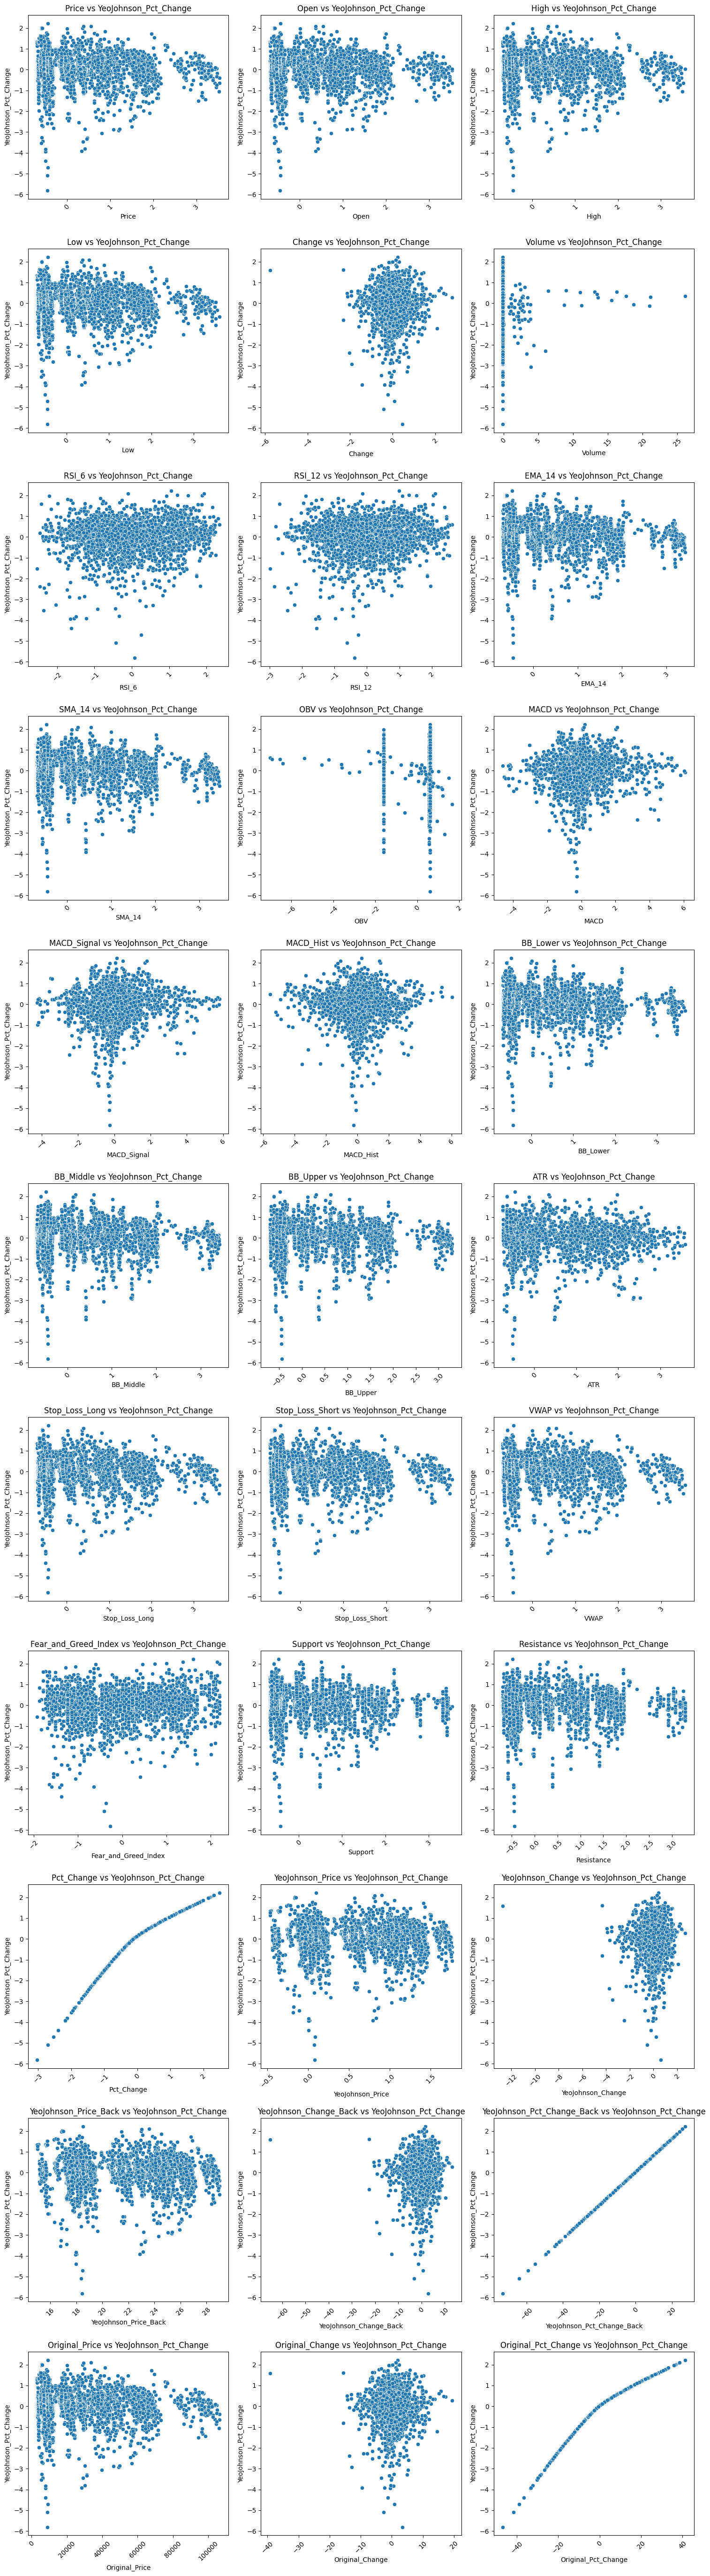

In [ ]:
# Select numeric columns
numeric_variables = scaled_btc_data.select_dtypes(include=['float64']).columns.tolist()

# Identify 2-dimensional columns
for column in numeric_variables:
    if len(scaled_btc_data[column].shape) != 1:  # Check if the column is not 1D
        print(f"Column '{column}' is 2-dimensional with shape {scaled_btc_data[column].shape}")

# Filter out 2D columns and remove target from predictors
numeric_variables = [col for col in numeric_variables if len(scaled_btc_data[col].shape) == 1 and col != target]

# Drop rows with missing values
data_numeric = scaled_btc_data[numeric_variables + [target]].dropna()

# Define number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numeric_variables) + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig = plt.figure(figsize=(15, 5 * n_rows))

# Create scatter plots
for i, column in enumerate(numeric_variables, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=data_numeric, x=column, y=target, ax=ax)
    ax.set_title(f"{column} vs {target}")
    ax.set_xlabel(column)
    ax.set_ylabel(target)

    # Rotate x-axis labels if they're too long
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

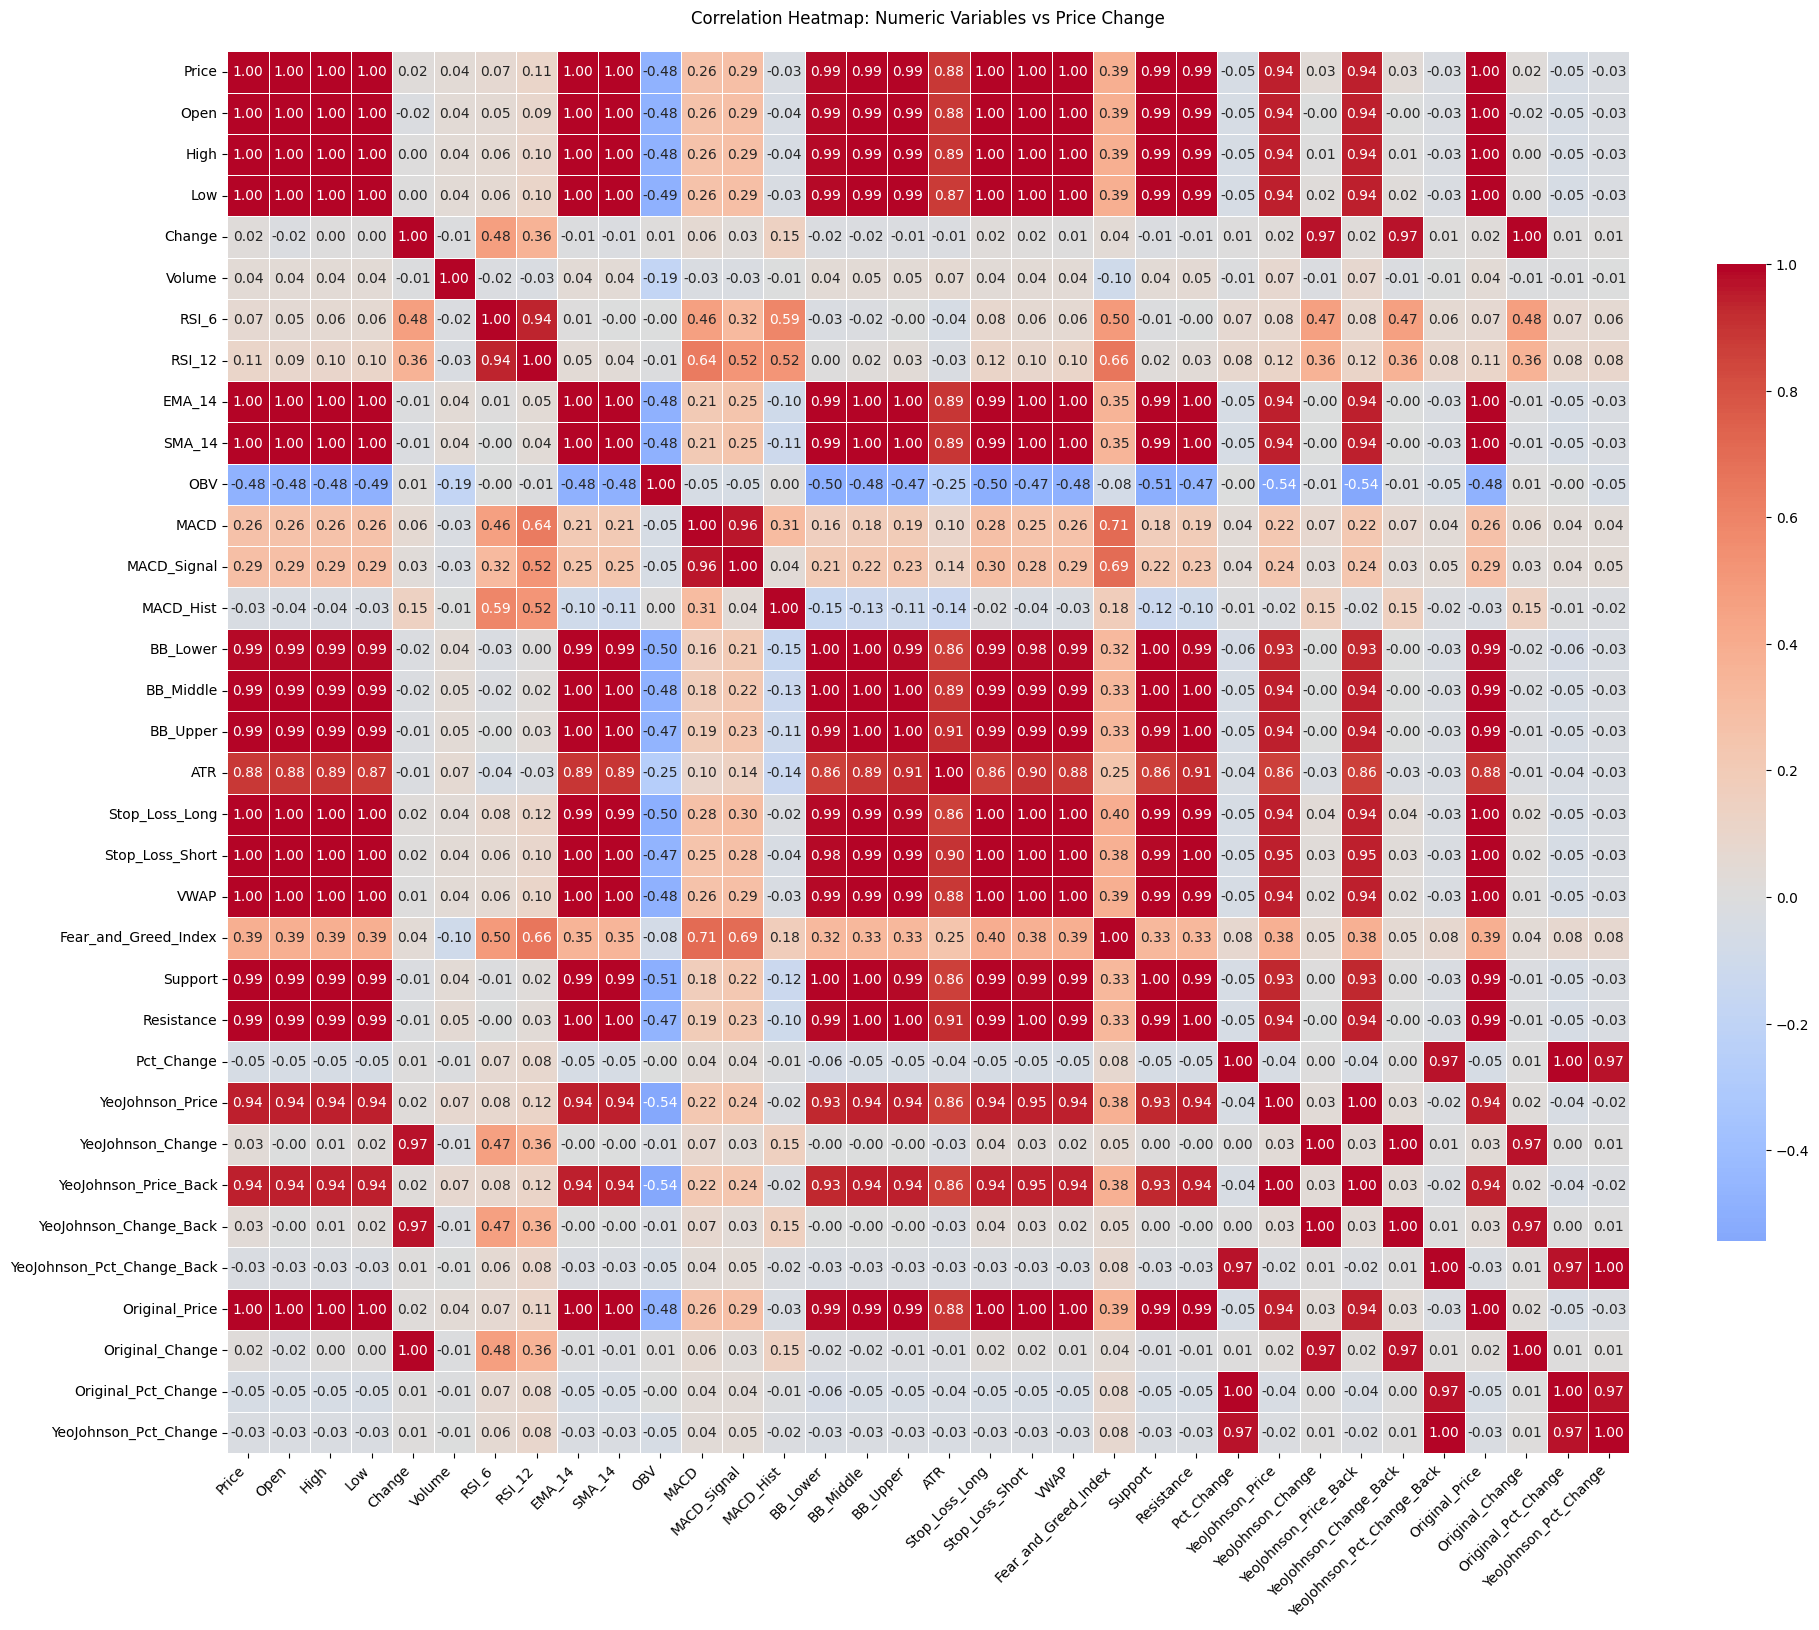

In [ ]:
# Create correlation matrix
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(20, 20))

# Create heatmap with annotations
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap: Numeric Variables vs Price Change', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

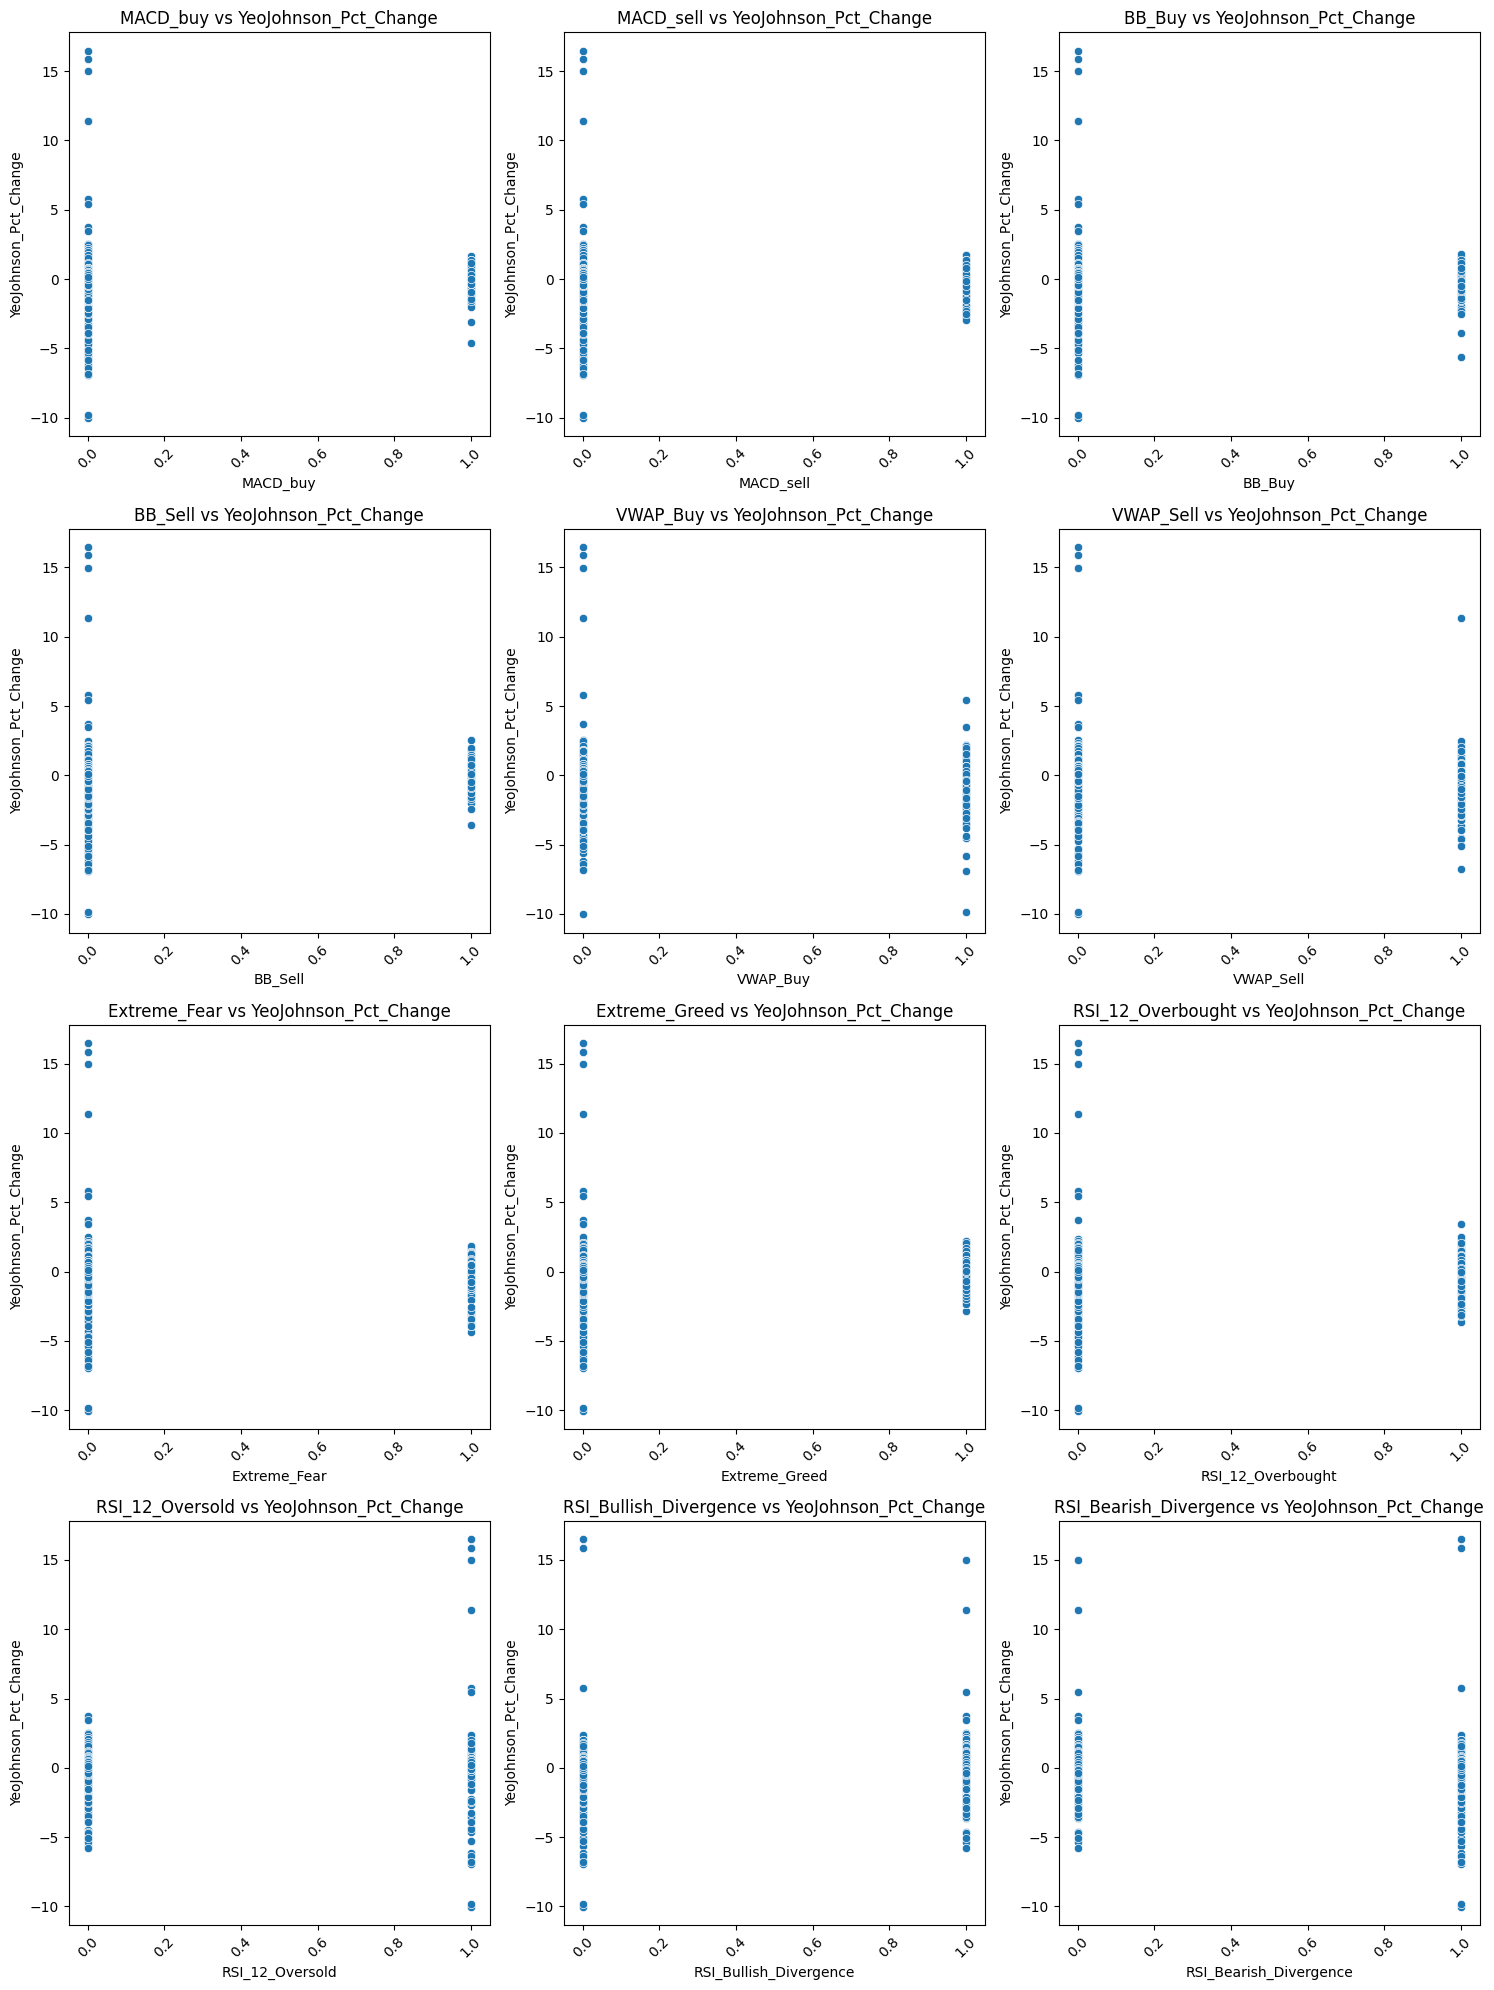

In [ ]:
# Select binary columns
binary_variables = scaled_btc_data.select_dtypes(include=['int64']).columns.tolist()

# Identify 2-dimensional columns
for column in binary_variables:
    if len(scaled_btc_data[column].shape) != 1:  # Check if the column is not 1D
        print(f"Column '{column}' is 2-dimensional with shape {scaled_btc_data[column].shape}")

# Filter out 2D columns and remove target from predictors
binary_variables = [col for col in binary_variables if len(scaled_btc_data[col].shape) == 1 and col != target]

# Drop rows with missing values
data_binary = scaled_btc_data[binary_variables + [target]].dropna()

# Define number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(binary_variables) + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig = plt.figure(figsize=(15, 5 * n_rows))

# Create scatter plots
for i, column in enumerate(binary_variables, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=data_binary, x=column, y=target, ax=ax)
    ax.set_title(f"{column} vs {target}")
    ax.set_xlabel(column)
    ax.set_ylabel(target)

    # Rotate x-axis labels if they're too long
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

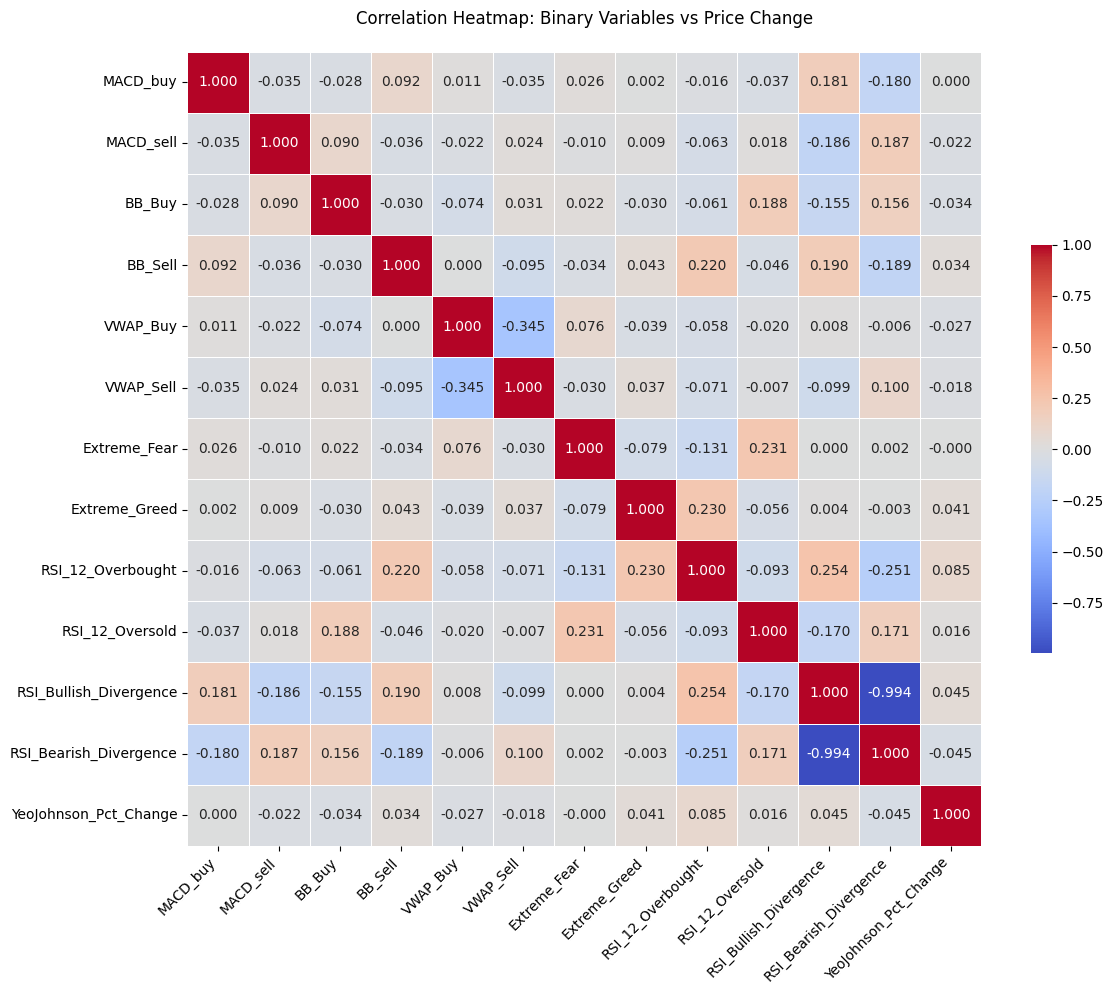

In [ ]:
# Create correlation matrix
correlation_matrix = data_binary.corr()

plt.figure(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            linewidths=0.5,
            cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap: Binary Variables vs Price Change', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

# Model Building

- Time-Based Splitting
- Selecting predictors
- Interaction terms

In [ ]:
from itertools import chain, combinations

def gen_combinations(input):
    return sum([list(map(list, combinations(input, i))) for i in range(1,len(input) + 1)], [])

def gen_interactions(X,de,pname):
    s = gen_combinations(range(len(pname)))
    VX = []
    VarX = []
    for i in range(len(s)):
        if len(s[i]) <= de:
            VX.append(np.prod(X[:,s[i]],axis=1))
            VarX.append(list([pname[x] for x in s[i]]))
    VarX2 = []
    for x in VarX:
        if len(x) > 1:
            VarX2.append('_'.join(x))
        else:
            VarX2.append(x[0])
    VX = pd.DataFrame(np.array(VX).T,columns=VarX2)
    return VX, VarX2

In [ ]:
# Step 1: Define relevant predictors (skip time-based and unscaled columns)
relevant_predictors = [
    'VWAP_Buy', 'MACD_buy', 'BB_Buy', 'RSI_12_Oversold', 'RSI_Bullish_Divergence',
    'VWAP', 'MACD', 'RSI_6', 'RSI_12', 'ATR'
]

# Step 2: Exclude redundant or invalid combinations
excluded_pairs = [
    ('VWAP_Buy', 'VWAP_Sell'),
    ('MACD_buy', 'MACD_sell'),
    ('BB_Buy', 'BB_Sell')
]

# Step 3: Filter the dataset for only relevant predictors
filtered_data = scaled_btc_data[relevant_predictors].dropna()
X = filtered_data.values  # Extract as numpy array
pname = filtered_data.columns.tolist()  # List of predictor names

# Step 4: Generate interaction terms
interaction_terms, interaction_names = gen_interactions(X, de=2, pname=pname)

# Step 5: Remove excluded interaction terms
valid_interactions = []
valid_names = []

for i, name in enumerate(interaction_names):
    # Split interaction term (e.g., "VWAP_Buy_MACD_buy" -> ["VWAP_Buy", "MACD_buy"])
    components = name.split('_')

    # Check if the pair is in the excluded list
    if len(components) == 2 and tuple(sorted(components)) in excluded_pairs:
        continue  # Skip this interaction term

    # Otherwise, keep it
    valid_interactions.append(interaction_terms.iloc[:, i])
    valid_names.append(name)

# Step 6: Convert valid interactions back to a DataFrame
interaction_df = pd.DataFrame(valid_interactions).T  # Transpose to align rows
interaction_df.columns = valid_names  # Set column names

# Step 7: Append interaction terms to the original dataset
scaled_btc_data_with_interactions = pd.concat([scaled_btc_data, interaction_df], axis=1)

# Display the first few rows of the updated dataset
scaled_btc_data_with_interactions.head()

##Model 1: Linear Regression

In [ ]:
predictors = valid_names

# Create the formula for the regression model
formula = f"{target} ~ {' + '.join(predictors)}"

# Fit the OLS regression model
lm_model = smf.ols(formula=formula, data= scaled_btc_data_with_interactions).fit()

# Print the summary of the model
print(lm_model.summary())

                              OLS Regression Results                             
Dep. Variable:     YeoJohnson_Pct_Change   R-squared:                       0.287
Model:                               OLS   Adj. R-squared:                  0.276
Method:                    Least Squares   F-statistic:                     25.53
Date:                   Wed, 23 Apr 2025   Prob (F-statistic):          3.43e-243
Time:                           18:09:28   Log-Likelihood:                -5094.9
No. Observations:                   4062   AIC:                         1.032e+04
Df Residuals:                       3998   BIC:                         1.072e+04
Df Model:                             63                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

### Checking Model Assumptions

Model assumption 1: Mean of residuals should be 0

Model assumption 2: No Heteroscedasticity

Model assumption 3: Linearity

Model assumption 4: Normality of the residuals

###Checking for Autocorrelation

###Checking for Multicollinearity

PCA

Lasso/ Ridge?

##Model 2: ANN

##Model 3: Random Forest/ XGBoost

##Model Validation and Hyperparameter Tuning

Cross-Validation with Time Series Split

#Model Performance Comparison

#Analyse Feature Importance

#Final Model Evaluation and Backtesting

Walk-Forward Validation